# How to Improvise Jazz Melodies
Bob Keller
Harvey Mudd College
January 2007
Revised September 4, 2012

There are different forms of jazz improvisation. For example, in “free improvisation”, the player is under absolutely no constraints. The listener is also under no obligation to remain a listener, and may tend to leave the scene if what she is hearing seems too close to random noise. Here we concentrate on “constrained improvisation”, meaning that we are playing over the chord changes of a tune.

## Know the Tune
It is a good idea to have some familiarity with the way the tune sounds with its original melody. Seasoned players can sometimes skip this, because the tune is similar to some other tune. There are fewer chord-change ideas than there are tunes, and there is a lot of reuse over the universal songbook. Coming up with new chord changes is not that easy for composers.

It is also good to be able to sense roughly where you are in the tune just by hearing the chord changes without the melody. This is achieved mostly by listening to the tune enough times, but an experienced player can hear it by reading the chord changes as well.

Finally, if the tune has words, it is helpful to know some of them and the story they are telling. Of course this is mandatory for the vocalist, but the instrumentalist can benefit by knowing the spirit of the tune.

## Play off the Melody
The most time-honored form of improvisation is to make small modifications to the melody, some times called “ad-libbing” (from latin “ad libitum” meaning freely). This is a good place to start, and also use in an occasional fashion later on.

## Know the Chord Changes
While it is good to be able to play “by ear”, it is best not to rely on having the chords sounded as your only method. For example, the chord might not always be sounded before you want the next note of your melody. Also, the comping (accompanying, or compensating) instrument in the rhythm section might drop out for a chorus, leaving just you and the bass and drums, just you and the drums, or just you in some cases. Unless you can hear the chords in your head, you might be stuck at this point.

## Use Chord Tones
Melody notes that are in the chord are very stable and resonate with the chord. Thirds and sevenths are particularly good choices. Below all notes in the melody are in the F chord.

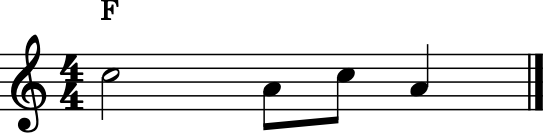

In [51]:
from music21 import *
from IPython.display import Image

def create_score(info, notes):
    s = stream.Score()
    part = stream.Part()
    if info[0] == "Treble":
        part.append(clef.TrebleClef())
    elif info[0] == "Bass":
        part.append(clef.BassClef)
    part.append(key.KeySignature(info[1]))
    part.append(meter.TimeSignature(info[2]))
    
    split_notes = notes.split(" ")
    for n in split_notes:
        if n[0] == "!":
            part.append(harmony.ChordSymbol(n[1:]))
        else:
            is_tie = "none"
            note_and_length = n.split("/")
            note_name = note_and_length[0]
            if "{" in note_and_length[1]:
                is_tie = "start"
                note_and_length[1] = note_and_length[1].replace("{", "")
            if "}" in note_and_length[1]:
                is_tie = "stop"
                note_and_length[1] = note_and_length[1].replace("}", "")
            if "*" in note_and_length[1]:
                length_and_col = note_and_length[1].split("*")
                note_length = length_and_col[0]
                note_col = length_and_col[1]
            else:
                note_length = note_and_length[1]
                note_col = ""
            if note_length == "0.3":
                note_length = 0.333333333
            else:
                note_length = float(note_length)
            if note_name == "R":
                add_n = note.Rest(quarterLength=note_length)
            else:
                add_n = note.Note(note_name, quarterLength=note_length)
            if is_tie != "none":
                add_n.tie = tie.Tie(is_tie)
            if note_col != "":
                add_n.style.color = note_col
            part.append(add_n)
    
    s.append(part)
    return Image(filename=s.write("musicxml.png"))

info = ["Treble", 0, "4/4"]
notes = "!F C5/2 A4/.5 C5/.5 A4/1"
create_score(info, notes)

## Use Color Tones
Often other tones are added to the chord to make a larger chord. Often this is done on the fly by the comping instrument. Sometimes these are implied by the original melody, and sometimes they are just known from experience. For example, over F major, it is reasonable safe to add (D the 6th, G the 9th, and E the major 7th). An awareness of the theory will help you know what tones sound good.

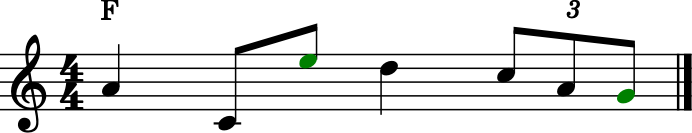

In [52]:
notes = "!F A4/1 C4/0.5 E5/0.5*green D5/1 C5/0.3 A4/0.3 G4/0.3*green"
create_score(info, notes)

*Using color tones (shown in green)*

## Use Arpeggios
An arpeggio consists of adjacent chord tones (or color tones, which are tones of an implied chord). They can go up or down, as in the following examples:

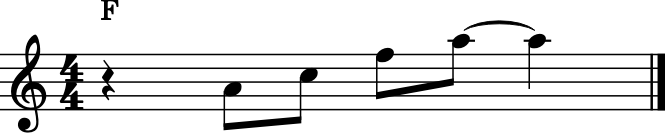

In [53]:
notes = "!F R/1 A4/0.5 C5/0.5 F5/0.5 A5/0.5{ A5/1}"
create_score(info, notes)

## Use Approach Tones
In the preceding example, the Bb is also ok because it *approaches* the chord tone a half- step away. This idea is often used to get a “jazzy” sound, even with notes that are not in the scale. Here is an extension of the previous example. Note that the F# is not remotely consistent with the F major chord, but it “works” because it approaches the G, which is a color tone over the F major.

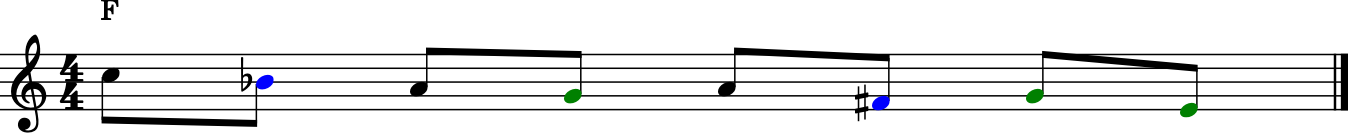

In [54]:
notes = "!F C5/0.5 B-4/0.5*blue A4/0.5 G4/0.5*green A4/0.5 F#4/0.5*blue G4/0.5*green E4/0.5*green"
create_score(info, notes)

*Approach tones (shown in blue)*

Below, the first E, which is a color tone, also functions as an approach tone.

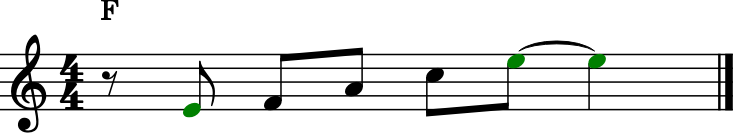

In [55]:
notes = "!F R/0.5 E4/0.5*green F4/0.5 A4/0.5 C5/0.5 E5/0.5*green{ E5/1*green}"
create_score(info, notes)

*Arpeggio on chord tones (starting on the major 7th, also on approach tone)*

The next example shows the tonic of the chord functioning as an approach tone, to the E.

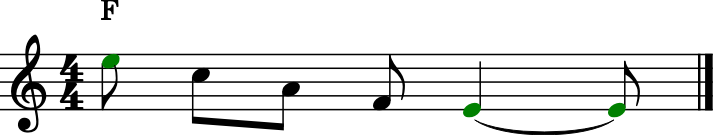

In [56]:
notes = "!F E5/0.5*green C5/0.5 A4/0.5 F4/0.5 E4/1*green{ E4/0.5*green}"
create_score(info, notes)

*Descending arpeggio starting and ending on the major 7th.*

*The tonic F functions as an approach tone (discussed on page 4) in this case.*